In [12]:
select_features=False

In [13]:
run load-clean-select.ipynb

Morphology was measured for 1029.0 cells.

The numbers of cells and nuclei correspond to each other.

The are no duplicated column names: True
The are no duplicated column names: True
Cytoplasm measurements were taken for 1029 cells.

The are no duplicated column names: True
Reading the dataset with E-cadherin...
E-cadherin was measured for 546 cells.

The are no duplicated column names: True
Reading the dataset with Vimentin and Cytokeratins...
Vimentin and Cytokeratins were measured for 483 cells.

The are no duplicated column names: True

Full dataset has shape: (1029, 562)
Initial shape is: (1029, 562)
Features with zero variance:
 Index(['centerZ_cell', 'eulernumber_cell', 'children_cytoplasm_count_cell',
       'loc_centermassintensityZ_wga', 'loc_centerZ_cell',
       'loc_maxintensityZ_wga', 'centerZ_nucl', 'eulernumber_nucl',
       'children_cells_count', 'children_cytoplasm_count_nucl',
       'loc_centermassintensityZ_dapi', 'loc_centerZ_nucl',
       'loc_maxintensityZ_dap

###### Undersample images

In [ ]:
# np.random.seed(42)
image_id = np.random.choice(measurements_red[measurements_red.stiffness == '2.0'].image.unique(), 20)
print(image_id)
measurements_red[measurements_red.image.isin(image_id)].shape

In [3]:
measurements_b = measurements_red.drop(measurements_red[measurements_red.image.isin(image_id)
                                                         ].index
                                        ).reset_index(drop=True)
measurements_b.shape

NameError: name 'image_id' is not defined

# Which dataset?

In [14]:
# The full dataset
df = measurements
# Dataset without clusters at 64kPa
# df = measurements_red
# Dataset without 0.5kPa, 8kPa and clusters at 64kPa
# df = measurements_5
# Dataset without 0.5kPa, 8kPa and clusters at 64kPa with balanced classes
# df = measurements_b
df.shape

(899, 499)

## Scale and save

In [ ]:
# Features to use
cols = geom_cols
# Feature map
X = df[cols]

# Standartise the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pd.DataFrame(data = X_scaled, columns = geom_cols).to_csv("../datasets/BandC_morphology.csv")

## Separate dataframes for combinations

In [11]:
dfB = df[df.combination == "B"].reset_index(drop=True)
dfC = df[df.combination == "C"].reset_index(drop=True)
print(dfB.shape, dfC.shape)

(422, 499) (477, 499)


# Some functions

In [5]:
# Prepare a vector of colours mapped to the 'stiffness' column
def create_palette(df, by='stiffness', show=False):
    if by == 'stiffness':
        n_levels = df.stiffness.unique().size
        palette = dict(zip(df.stiffness.unique(), sns.color_palette("Set3", n_levels)))
        row_colors = df.stiffness.map(palette)
    elif by == 'cluster':
        n_levels = df.cluster.unique().size
        if n_levels == 2:
            palette = {0 : sns.color_palette("PRGn", 20)[15], 1 : sns.color_palette("PRGn", 20)[4]}
#             palette = dict(zip(df.cluster.unique(), sns.xkcd_palette(["powder blue", "pale orange"])))
        else:
            palette = dict(zip(range(n_levels), sns.color_palette("Set2", n_levels)))
        row_colors = df.cluster.map(palette)
    elif by == 'biom':
        palette = {df.biom.unique()[0] : sns.color_palette("RdBu", 10)[1],
                   df.biom.unique()[1] : sns.color_palette("RdBu", 10)[8]}
        row_colors = df.biom.map(palette)
    elif by == 'comb':
        palette = {df.combination.unique()[0] : sns.color_palette("RdBu", 10)[1],
                   df.combination.unique()[1] : sns.color_palette("RdBu", 10)[8]}
        row_colors = df.combination.map(palette)
        
    if show:
#         print(list(palette.keys()))
        sns.palplot(palette.values());
    
    return row_colors, palette
# plt.savefig('../results/My palette.png', bbox_inches='tight', dpi=300);

# PCA on geometric features

In [21]:
pca_model, pc_cols, pc_df = func.pca(df, geom_cols)

The first 54 components explain 90% of variance.

Explained variance: [0.14818974 0.10008946 0.06011495 0.0485374  0.04186417 0.03544564
 0.03198735 0.02606593 0.0232884  0.02290923 0.01738543 0.01506599
 0.01503931 0.01481861 0.01375449 0.01307594 0.01264749 0.0125223
 0.01197534 0.01176136 0.01041734 0.01004739 0.00985483 0.00970496
 0.00941926 0.00912423 0.00880349 0.00843206 0.00817119 0.0077974
 0.00770265 0.00760607 0.00749775 0.00709944 0.0070483  0.00666867
 0.00661681 0.00625961 0.00612162 0.00595981 0.00582847 0.0056629
 0.00538948 0.00529782 0.00508981 0.00506823 0.00485404 0.00483338
 0.00452613 0.0043975  0.00414467 0.00400176 0.00387882 0.00386219]

(899, 152) (54, 152) (899, 54) (899, 58)


/Applications/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


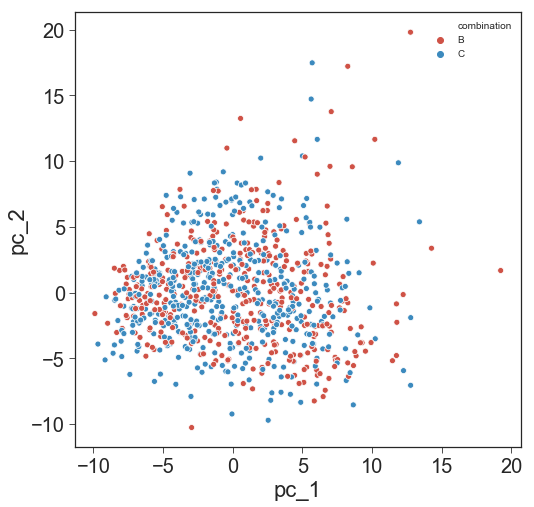

In [22]:
plt.rc("figure", figsize=(8, 8))

# row_colors, palette = create_palette(df, by='stiffness')
row_colors, palette = create_palette(df, by='comb')

# sns.scatterplot(x='pc_1', y='pc_2', data=pc_df, 
#                 hue='stiffness', palette=palette);
sns.scatterplot(x='pc_1', y='pc_2', data=pc_df, hue='combination', palette=palette);

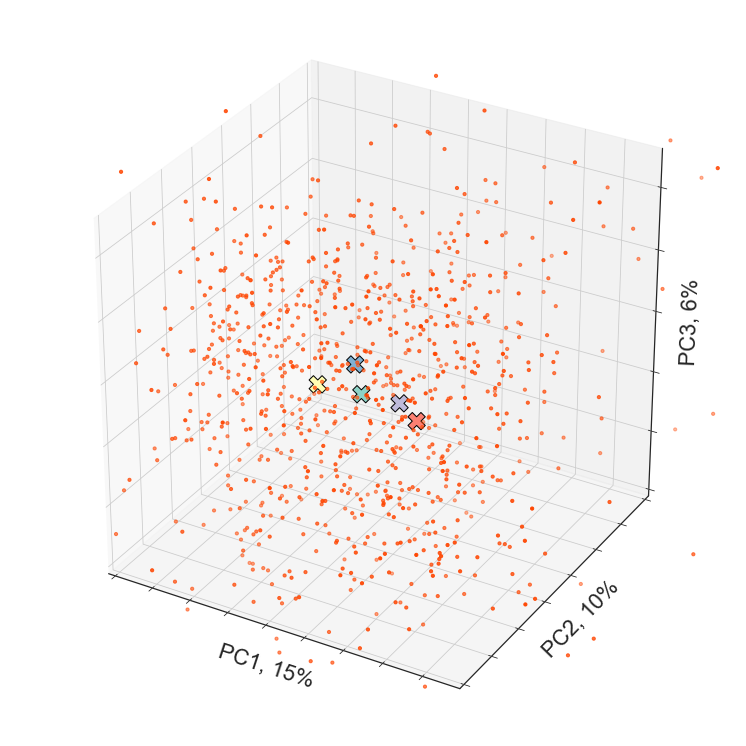

In [24]:
from mpl_toolkits.mplot3d import Axes3D

plt.rc("figure", figsize=(10, 10))

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(pc_df.pc_1, pc_df.pc_2, pc_df.pc_3, s=10, c='orangered');

ax.set_xticklabels([]);
ax.set_yticklabels([]);
ax.set_zticklabels([]);

ax.set_xlabel('PC1, 15%');
ax.set_ylabel('PC2, 10%');
ax.set_zlabel('PC3, 6%');

ax.set_xlim([-10, 7.5]);
ax.set_ylim([-4, 10]);
ax.set_zlim([-6, 5]);

centroids = pc_df.groupby('stiffness')[['pc_1', 'pc_2', 'pc_3']].mean().reset_index()

ax.scatter(centroids.pc_1, centroids.pc_2, centroids.pc_3, 
           s=300, alpha=1, 
           marker='X', edgecolor='black',
           c=sns.color_palette("Set3", 5));

plt.savefig('../results/PCA 3D centroids.png', bbox_inches='tight', dpi=300);

# Hierarchical clustering

In [ ]:
# Features to use
cols = geom_cols

print(df[cols].shape)

X = df[cols]

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

row_colors, palette = create_palette(df)

sns.clustermap(pd.DataFrame(X_scaled, columns=cols), 
               metric='euclidean', method='ward',
               col_cluster=False,
               cmap=sns.color_palette('RdBu_r', 100), robust=True, 
               row_colors=row_colors);

# plt.savefig('../results/Clustering syn.png', bbox_inches='tight', dpi=300);

# Define subpopulations

## How many subpopulations?

In [ ]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from s_dbw import SD
# X = df.loc[df.combination == "C", cols]
X = df[cols]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

silhouette = []
ch_score = []
db_score = []
sd_score = []

cluster_range = range(2, 10)
for n_clusters in cluster_range:
    agg = AgglomerativeClustering(n_clusters=n_clusters)
    agg.fit(X_scaled)
    silhouette.append(silhouette_score(X_scaled, agg.labels_, metric='euclidean'))
    ch_score.append(calinski_harabasz_score(X_scaled, agg.labels_))
    db_score.append(davies_bouldin_score(X_scaled, agg.labels_))
    sd_score.append(SD(X_scaled, agg.labels_))

In [ ]:
plt.rcParams['figure.figsize'] = (6, 3)
# The higher the better
plt.plot(cluster_range, silhouette);

In [ ]:
# The higher the better
plt.plot(cluster_range, ch_score);

In [ ]:
# Zero is better
plt.plot(cluster_range, db_score);

In [ ]:
# The lower the better
plt.plot(cluster_range, sd_score);

## Visualise subpopulations

In [ ]:
# cols = geom_cols
n_clusters = 3

func.hc(df, cols, n_clusters, save=True)

In [ ]:
func.hc(dfB, geom_cols, n_clusters=3, save=False)

In [ ]:
func.hc(dfC, geom_cols, n_clusters=3, save=False)

In [ ]:
# Number of observations in each cluster
plt.rcParams['figure.figsize'] = (4, 4)
row_colors, palette = create_palette(df, by='cluster')

sns.countplot(x="cluster", data=df, palette=palette);
plt.xlabel("Cluster");
plt.ylabel("Count");
plt.title("Number of cells in each subpopulation");

In [ ]:
df.groupby('cluster').size()

In [ ]:
dfB.groupby('cluster').size()

In [ ]:
dfC.groupby('cluster').size()

## Distribution of clusters

### Simple proportion:
** Proportion of cells of each cluster to total cell number per stiffness**

In [ ]:
counts = df.groupby('stiffness').cluster.value_counts().unstack()
cluster_cols = ['cluster'+ str(n) for n in range(n_clusters)]
counts.columns = cluster_cols
counts['total'] = df.groupby('stiffness').size()
for col in cluster_cols:
    counts[col] = counts[col] / counts.total * 100
counts

In [ ]:
counts.iloc[:, 0 : n_clusters].plot(kind='bar', width=0.7, 
                                    stacked=True, 
                                    color=palette.values(), 
                                    figsize=(5, 5));

plt.xticks(rotation='horizontal')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), 
           fontsize=18, 
           labels= ['Cell type ' + str(i) for i in range(n_clusters)]);
plt.xlabel("Stiffness");
plt.ylabel("Percentage");
plt.title("Proportion of cells of each type across stiffness values");
# plt.savefig('../results/Clusters geom_cols.png', bbox_inches='tight', dpi=300);

### Add confidence intervals for proportions
** For two clusters only**

In [ ]:
if n_clusters > 2:
    print("Error, check maths!")
else:
    counts['err'] = 1.96 * np.sqrt(counts.cluster0 * counts.cluster1 / counts.total)

In [ ]:
counts.loc[:, ['cluster0', 'cluster1']].plot(kind='bar', width=0.8, 
                                             yerr=counts.err, capsize=4,
                                             color=palette.values(), 
                                             figsize=(6, 4));

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18, 
           labels=['Cell type ' + str(i) for i in range(n_clusters)]);
plt.xticks(rotation='horizontal')
plt.xlabel("Stiffness, kPa");
plt.ylabel("Proportion");
plt.ylim([0, 100])
# plt.title("Proportion of cells of each type across stiffness values");
plt.savefig('../results/Clusters geom_cols.png', bbox_inches='tight', dpi=300);

### Distribution of clusters across images and stiffness values

In [ ]:
counts = df.groupby(['stiffness', 'image']).cluster.value_counts().unstack().fillna(0)
counts.columns = ['cluster 1', 'cluster 2']
counts['total'] = df.groupby(['stiffness', 'image']).size()
counts['p'] = counts['cluster 1'] / counts.total * 100
counts['1-p'] = counts['cluster 2'] / counts.total * 100
counts.head()

In [ ]:
counts.reset_index(inplace=True)
counts = pd.melt(counts, id_vars=['stiffness'], value_vars=['p', '1-p'])
counts.head()

In [ ]:
plt.rcParams['figure.figsize'] = (4, 6)

row_colors, palette = create_palette(df, by='cluster')

sns.barplot(x='stiffness', y='value', 
            hue='variable', data=counts,
            ci=95, capsize=.1, 
            palette=palette.values());
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18);
plt.xlabel("Stiffness, kPa");
plt.ylabel("Proportion");
plt.ylim([0, 100]);
# plt.title("Distribution of cell types across stiffness values");
plt.savefig('../results/Clusters geom_cols.png', bbox_inches='tight', dpi=300);

# An average "cell" of each cluster

In [ ]:
from sklearn.metrics import pairwise_distances


df_scaled = pd.concat([df.loc[:, ['label', 'stiffness', 'cluster']], 
                       pd.DataFrame(data = X_scaled, columns = cols)], axis=1)

_, pc_cols, pc_df = func.pca(df, cols)

row_colors, palette = create_palette(df, by='cluster')
plt.rcParams['figure.figsize'] = (5, 5)

sns.scatterplot(x='pc_1', y='pc_2', data=pc_df, hue='cluster', palette=palette);

for cluster in range(n_clusters):
    avg_cell_pca = pc_df.loc[pc_df.cluster == cluster, pc_cols].mean().values.reshape(1, -1)
    
    plt.scatter(avg_cell_pca[0,0], avg_cell_pca[0,1], s=200, marker='X', edgecolor='white', c='k');
    
    distances = pairwise_distances(pc_df.loc[pc_df.cluster == cluster, pc_cols],
                                   avg_cell_pca.ravel().reshape(1, -1))
    avg_cell = df.loc[df.cluster == cluster].reset_index().iloc[distances.argmin()]
    print("\nThe centroid of cluster {} is the cell with local index {} and label {}.".format(cluster, distances.argmin(), avg_cell.label))
    
    print("Cluster variance:", (distances**2).mean())

# Determine most important features

** Hyperparameter tuning **

In [ ]:
best_rf_clf = rf.random_search_param(rf_clf, X_train, y_train)

** Save the best estimator **

In [ ]:
joblib.dump(best_rf_clf, 'models/try_new_approach.pkl')

** Load the best estimator **

In [ ]:
best_rf_clf = joblib.load('models/try_new_approach.pkl')

In [ ]:
X = df[cols]
y = df.cluster

selected_features = 'measurements_5_over90_morph.txt'
X = proc.select_features(X, filename=selected_features, cols='geom')
 
# Create train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

** Evaluate the model **

In [ ]:
rf.test_rf_model(rf_clf, 0, X_train, X_test, y_train, y_test)

In [ ]:
important_features = rf.get_important_features(rf_clf, X.columns)

###### New observations

In [ ]:
y_pred = best_rf_clf.predict(clumped[cols])
y_pred

In [ ]:
plot_corr(df[important_features.feature].corr(), mask=False, threshold=0.8, annot=True)

In [ ]:
bla = important_features[0:5].feature

In [ ]:
plt.rcParams['figure.figsize'] = (6, 4)

sns.heatmap(df[bla].corr(), 
            annot=True,
            annot_kws={"size": 16},
            vmin=-1, vmax=1,
            xticklabels=False,
            yticklabels=False,
            cmap=sns.color_palette("RdBu_r", 20));
plt.savefig('../results/for thesis.png', bbox_inches='tight', dpi=300);

In [ ]:
plot_corr(df[important_features.feature].corr(), mask=False, threshold=0.8, annot=True)

## Boxplots of most important features

In [ ]:
def px_to_um(x):
    return x * 0.2076

In [ ]:
def stat_annot(df, by, col, x_start, x_end, signif, ylim, kind='barplot'):
    """
    Add annotation to show the results of statistical testing.
    """
    s = df[by].unique()
    h = (ylim[1] - ylim[0])/50
    
    for x1, x2, label in zip(x_start, x_end, signif):

        if kind == 'barplot':
            y = max(df.loc[df[by] == s[x1], col].mean() + df.loc[df[by] == s[x1], col].std(), 
                    df.loc[df[by] == s[x2], col].mean() + df.loc[df[by] == s[x2], col].std()) + h
        elif kind == 'boxplot':
            y = max(upper_whisker(df.loc[df[by] == s[x1], col]), 
                    upper_whisker(df.loc[df[by] == s[x2], col])) + h

        plt.plot([x1+0.05, x1+0.05, x2-0.05, x2-0.05], [y, y + h, y + h, y], 
                 lw=1.5, color='k');

        plt.text((x1 + x2) * 0.5, y + h, s=label, 
                 ha='center', va='bottom', 
                 color='k', fontsize=20);
        plt.ylim(ylim)
        
        
def upper_whisker(x):
    iqr = x.quantile(0.75) - x.quantile(0.25)
    print(x.median() + 1.5 * iqr)
    return x.median() + 1.5 * iqr

In [ ]:
plt.rcParams['figure.figsize'] = (2, 4)

row_colors, palette = create_palette(df, by='cluster')
col = important_features.iloc[0,0]

sns.boxplot(x='cluster', y=col, data=df,
            width=0.6, palette=palette, showfliers=False);

x_start, x_end, signif = func.ttest(df, 'cluster', col, equal_var=False, verbose=False)
func.stat_annot(df, 'cluster', col, x_start, x_end, signif, [0.3, 1.25], kind='boxplot')

plt.xlabel("Cell type");
plt.ylabel("Eccentricity, a.u.");
plt.savefig('../results/eccentricity per cluster.png', bbox_inches='tight', dpi=300);

In [ ]:
plt.rcParams['figure.figsize'] = (2, 4)

row_colors, palette = create_palette(df, by='cluster')
col = important_features.iloc[1,0]

sns.boxplot(x='cluster', y=col, data=df,
            width=0.6, palette=palette, showfliers=False);

x_start, x_end, signif = func.ttest(df, 'cluster', col, equal_var=False, verbose=False)
# func.stat_annot(df, 'cluster', col, x_start, x_end, signif, [0.8, 7], kind='boxplot')

plt.ylim([0.8, 8])
plt.xlabel("Cell type");
plt.ylabel("Compactness, a.u.");
# plt.savefig('../results/compactness per cluster.png', bbox_inches='tight', dpi=300);

In [ ]:
plt.rcParams['figure.figsize'] = (2, 4)

row_colors, palette = create_palette(df, by='cluster')
col = important_features.iloc[5,0]

sns.boxplot(x='cluster', y=col, data=df,
            width=0.6, palette=palette, showfliers=False);

x_start, x_end, signif = func.ttest(df, 'cluster', col, equal_var=False, verbose=False)
# func.stat_annot(df, 'cluster', col, x_start, x_end, signif, [0, 1.3], kind='boxplot')

plt.ylim([0, 1.3])
plt.xlabel("Cell type");
plt.ylabel("Circularity, a.u.");
# plt.savefig('../results/circularity per cluster.png', bbox_inches='tight', dpi=300);

## Cells that are further apart

In [ ]:
from sklearn.metrics import pairwise_distances

dist = pairwise_distances(X_reduced)

dist.argmax() - df.shape[0]*(dist.argmax()//df.shape[0])

In [ ]:
pc_df.loc[pc_df.pc_1 < -5.5]

In [ ]:
pc_df.loc[pc_df.pc_1 > 7]

## PCA stiffness against cluster

In [ ]:
plt.rc("figure", figsize=(8, 8))

centroids = pc_df.groupby('stiffness')[['pc_1', 'pc_2']].mean().reset_index()

row_colors, palette = create_palette(df, by='stiffness')
sns.scatterplot(x='pc_1', y='pc_2', data=pc_df, 
                style='cluster', markers=['o', 's'],
                hue='stiffness', palette=palette);

sns.scatterplot(x="pc_1", y="pc_2", data=centroids, 
                hue='stiffness', palette=palette, 
                s=200, marker='X', edgecolor='black', 
                legend=None);

# Relationship to biomarkers

## Correlations with biom features

In [ ]:
p_corr = df[biom_cols].corrwith(df.cluster, method='spearman')

print(p_corr.abs().sort_values(ascending=False).head(10))

plt.rcParams['figure.figsize'] = (15, 2)

sns.heatmap(pd.DataFrame(p_corr, columns=['Pearsons']).T, 
            cmap=sns.color_palette("RdBu_r", 100), 
            vmin=-1, vmax=1);

## Expression in clusters

In [ ]:
row_colors, palette = create_palette(df, by='cluster')
plt.rcParams['figure.figsize'] = (2, 4)

sns.boxplot(x='cluster', y='integratedintensity_ecad', data=df,
            width=0.6, palette=palette, showfliers=False);

# plt.ylim([0, 1]);
plt.xlabel("Cell type");
plt.ylabel("E-cadherin, um");
# plt.savefig('../results/Ecad per cluster.png', bbox_inches='tight', dpi=300);

In [ ]:
sns.boxplot(x='cluster', y='integratedintensity_vim', data=df,
            width=0.6, palette=palette, showfliers=False);

# plt.ylim([0, 1]);
plt.xlabel("Cell type");
plt.ylabel("E-cadherin, um");
# plt.savefig('../results/Ecad per cluster.png', bbox_inches='tight', dpi=300);

In [ ]:
sns.boxplot(x='cluster', y='integratedintensity_ker', data=df,
            width=0.6, palette=palette, showfliers=False);

# plt.ylim([0, 1]);
plt.xlabel("Cell type");
plt.ylabel("E-cadherin, um");
# plt.savefig('../results/Ecad per cluster.png', bbox_inches='tight', dpi=300);

### Mass displacement

** Show on a single plot**

In [ ]:
tmp = pd.melt(df[['stiffness', 'cluster', 'massdisplacement_ker', 'massdisplacement_ecad']],
              id_vars=['stiffness', 'cluster'],
              value_vars=['massdisplacement_ker', 'massdisplacement_ecad'], 
              var_name='biom', value_name='massdisp')

In [ ]:
plt.rcParams['figure.figsize'] = (5, 4)

row_colors, palette = create_palette(tmp, 'biom')

sns.boxplot(x=tmp.cluster, y=px_to_um(tmp.massdisp), 
            hue=tmp.biom, palette=palette,
            width=0.6, showfliers=False);

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18);
plt.ylim([0, 17]);
plt.xlabel("Cell type");
plt.ylabel("Displacement, um");
plt.title("")
plt.savefig('../results/massdisp per cluster.png', bbox_inches='tight', dpi=300);

** Separate plots and statistical testing**

In [ ]:
plt.rcParams['figure.figsize'] = (2, 4)

row_colors, palette = create_palette(df, by='cluster')

sns.boxplot(x=df.cluster, y=df.meanintensity_wga / df.area_cell, 
            width=0.6, palette=palette, showfliers=False);

# plt.ylim([0, 13]);
plt.xlabel("Cell type");
plt.ylabel("Mass displacement, um");
plt.title("Cytokeratins")
# plt.savefig('../results/massdisp ker per cluster.png', bbox_inches='tight', dpi=300);

In [ ]:
stat_tests('massdisplacement_ker')

In [ ]:
plt.rcParams['figure.figsize'] = (2, 4)
sns.boxplot(x=df.cluster, y=px_to_um(df.massdisplacement_vim), 
            width=0.6, palette=palette, showfliers=False);

plt.ylim([0, 17]);
plt.xlabel("Cell type");
plt.ylabel("Mass displacement, um");
plt.title("Vimentin");
plt.savefig('../results/massdisp vim per cluster.png', bbox_inches='tight', dpi=300);

In [ ]:
stat_tests('massdisplacement_vim')

## CTCF of ker and vim

In [ ]:
plt.rcParams['figure.figsize'] = (2, 4)

row_colors, palette = create_palette(df, by='cluster')

sns.boxplot(x=df.cluster, y=df.ctcf_ker, 
            width=0.6, palette=palette, showfliers=False);
# plt.figure()
# sns.barplot(x=df.cluster, y=df.ctcf_ker, 
#             ci=95, capsize=.1, palette=palette);

# plt.ylim([0, 13]);
plt.xlabel("Cell type");
plt.ylabel("CTCF, um");
plt.title("Cytokeratins");
plt.savefig('../results/ker per cluster.png', bbox_inches='tight', dpi=300);

In [ ]:
stat_tests('ctcf_ker')

In [ ]:
plt.rcParams['figure.figsize'] = (2, 4)

row_colors, palette = create_palette(df, by='cluster')

sns.boxplot(x=df.cluster, y=df.ctcf_vim, 
            width=0.6, palette=palette, showfliers=False);
# plt.figure()
# sns.barplot(x=df.cluster, y=df.ctcf_vim, 
#             ci=95, capsize=.1, palette=palette);

# plt.ylim([0, 13]);
plt.xlabel("Cell type");
plt.ylabel("CTCF, um");
plt.title("Vimentin");
plt.savefig('../results/vim per cluster.png', bbox_inches='tight', dpi=300);

In [ ]:
stat_tests('ctcf_vim')

## CV ratio

In [ ]:
plt.rcParams['figure.figsize'] = (2, 4)

row_colors, palette = create_palette(df, by='cluster')

sns.boxplot(x=df.cluster, y=df.cvratio, 
            width=0.6, palette=palette, showfliers=False);
# plt.figure()
# sns.barplot(x=df.cluster, y=df.cvratio, 
#             ci=95, capsize=.1, palette=palette);

# plt.ylim([0, 13]);
plt.xlabel("Cell type");
plt.ylabel("Ratio, a.u.");
plt.title("Cytokeratins to Vimentin ratio");
plt.savefig('../results/CVR per cluster.png', bbox_inches='tight', dpi=300);

In [ ]:
stat_tests('cvratio')

## Regions of biomarker levels

In [ ]:
df['region'] = "00"
df.loc[(df.ctcf_ker < df.ctcf_ker.median()) & (df.ctcf_vim > df.ctcf_vim.median()), 'region'] = "01"
df.loc[(df.ctcf_ker > df.ctcf_ker.median()) & (df.ctcf_vim < df.ctcf_vim.median()), 'region'] = "10"
df.loc[(df.ctcf_ker > df.ctcf_ker.median()) & (df.ctcf_vim > df.ctcf_vim.median()), 'region'] = "11"

In [ ]:
# Number of observations in each region
sns.countplot(x="region", data=df);
plt.xlabel("Region");
plt.ylabel("Count");
plt.title("Number of cells in each region");

In [ ]:
plt.rcParams['figure.figsize'] = (12, 12)

sns.scatterplot(x='ctcf_ker', y='ctcf_vim', data=df,
                hue='stiffness', style='region', s=100,
                palette=sns.color_palette("Set3", 5));

In [ ]:
df.groupby(['stiffness', 'region']).size()

In [ ]:
plt.rcParams['figure.figsize'] = (5, 5)

tmp = df.groupby(['stiffness', 'region']).size().unstack()

tmp['total'] = df.groupby('stiffness').size()

tmp['00'] = tmp['00'] / tmp.total * 100
tmp['01'] = tmp['01'] / tmp.total * 100
tmp['10'] = tmp['10'] / tmp.total * 100
tmp['11'] = tmp['11'] / tmp.total * 100

tmp.iloc[:, 0 : 4].plot(kind='bar', width=0.7, stacked=True, color=sns.color_palette("Set2", 4));


plt.xticks(rotation='horizontal')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=18, 
           labels=('Low cytokeratins, low vimentin', 
                   'Low cytokeratins, high vimentin', 
                   'High cytokeratins, low vimentin', 
                   'High cytokeratins, high vimentin'));
plt.xlabel("Stiffness, kPa");
plt.ylabel("Proportion");
# plt.title("Proportion of cells of each type across stiffness values");

In [ ]:
df.groupby(['stiffness', 'cluster']).ctcf_ker.mean()

In [ ]:
df.groupby(['stiffness', 'cluster']).ctcf_vim.median()

In [ ]:
plt.rcParams['figure.figsize'] = (6, 4)
sns.barplot(x='stiffness', y='ctcf_ker', 
            hue='cluster', data=df,
            ci='sd', capsize=.1,
#             showfliers=False,
            palette=palette.values());

In [ ]:
sns.barplot(x='stiffness', y='ctcf_vim', 
            hue='cluster', data=df,
            ci=95, capsize=.1,
#             showfliers=False,
            palette=palette.values());

In [ ]:
sns.boxplot(x=df.stiffness, y=df.massdisplacement_vim, width = 0.6, showfliers=False);